# <span style="color:#900C3F"> Laboratorio di Simulazione Numerica</span>

# <span style="color: #C70039 "> Esercitazione 5</span>

### <span style="color: #FF5733 "> Esercizio 05.1</span>

L'esercizio chiede di campionare le distribuzioni di probabilità $|\Psi_{1,0,0}(x,y,z)|^2$ (lo stato 1S dell'atomo di idrogeno) e $|\Psi_{2,1,0}(x,y,z)|^2$ (lo stato 2P dell'atomo di idrogeno), dove:  
$$
\Psi_{1,0,0}(r,\theta,\phi)=
\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0} 
$$  
e $$
\Psi_{2,1,0}(r,\theta,\phi)=
\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta)
$$  
usando l'algoritmo di Metropolis.  

 **L'algoritmo**:  
 Si desidera campionare la distribuzione *p(x)*. L'algoritmo di Metropolis funziona come una sorta di *random walk* i cui passi vengono scelti (estratti da una certa distribuzione di probabilità *T(x'|x)* e poi accettati o rifiutati) in modo che la distribuzione dei punti visitati tenda asintoticamente alla distribuzione desiderata.  
In particolare, si parte dal punto $x_{n}$ e si genera il punto *x'* da *T(x'|$x_{n}$)*. Si calcola poi la quantità $A(x'|x_{n})=min\left\{1, \frac{T(x_{n}|x')p(x')}{T(x'|x_{n})p(x_{n})}\right\}=\alpha$ e si accetta con probabilità $\alpha$ la mossa proposta: si estrae $p\in [0;1]$ e se $p\leq \alpha$ si accetta ($x_{n+1}=x'$), altrimenti si rifiuta.  
Quando la distribuzione di probabilità *T(x'|x)* è simmetrica, la quantità $\alpha$ può essere calcolata come $\alpha=min\left\{1, \frac{p(x')}{p(x_{n})}\right\}$.  
Se si lavora in cartesiane (come nel caso della richiesta dell'esercizio), la proposta della nuova posizione viene fatta estraendo ciascuna delle tre coordinate *x,y,z* da una distribuzione uniforme centrata nella posizione attuale e di larghezza $2\delta$. Esiste poi una regola empirica che suggerisce di regolare *T(x'|x)* e le sue proprietà (in questo caso proprio il valore di $\delta$) in modo che vengano accettate circa le metà delle mosse proposte.  

Due aspetti notevi del Metropolis sono il fatto che sia in grado di campionare qualsiasi distribuzione di probabilità e il fatto che le normalizzazioni presenti nelle distribuzioni si semplificano nel calcolo della quantità $\alpha$ (si possono quindi campionare anche distribuzioni di proababilità di cui non si conosce la normalizzazione).

**Il mio codice**:  
Il mio dice è strutturato nel seguente modo:  
c'è una funzione *Input* che legge da file il valore di $\delta$, $x_{iniziale}$, $y_{iniziale}$, $z_{iniziale}$, il numero di step, il numero di blocchi e lo stato che si desidera campionare (1S o 2P). C'è poi una funzione *Equilibrazione* che esegue alcuni step dell'algoritmo e regola la quantità $\delta$ in modo che l'accettanza ($\frac{numero\;di\;mosse\;accettate}{numero\;di\;mosse\;proposte}$) sia circa $\frac{1}{2}$ (in particolare ho scelto di considerare l'equilibrazione terminata quando l'accettanza è compresa tra 0.48 e 0.52). Inizio poi il vero e proprio campionamento, ciclando sui blocchi. Con la funzione *Passo* eseguo un passo dell'algoritmo e con la funzione *Accumula* accumulo la posizione $r=\sqrt{x^2+y^2+z^2}$ attuale. Nella funzione *Blocks* calcolo e stampo su file di output la media del blocco e la sua incertezza statistica, per poi rimettere a zero l'accumulatore *r*.

Ho realizzato i grafici della quantità $\langle r \rangle$ in unità del raggio di Bhor $a_{0}$ nel caso dello stato 1S e nel caso del 2P e ho indicato in rosso nel grafico i valori di aspettazione calcolati in modo esatto (sempre in unità del raggio di Bhor, $\frac{3}{2}$ per l'1S e 5 per il 2P).  
Si riportano di seguito i risultati ottenuti partendo dall'origine e facendo 1000000 mosse divise in 1000 blocchi.

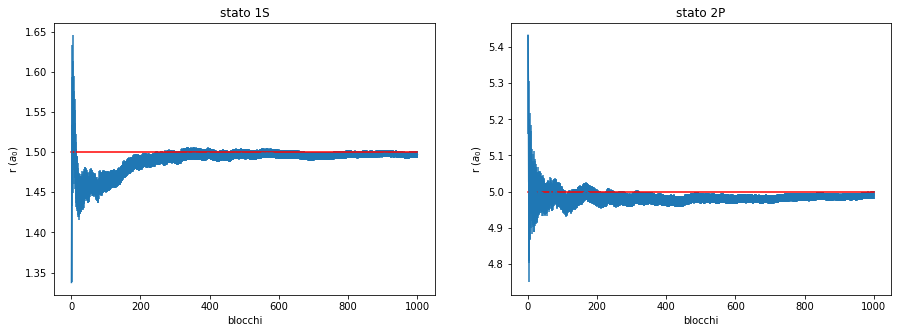

In [27]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
b, r, error = np.loadtxt("es05.1/1Sposizioni.dat", usecols=(0,1,2), delimiter='\t', unpack='true')
plt.errorbar(b,r,yerr=error)
g=np.full(b.size, 1.5)
plt.plot(b,g,c="red")
plt.xlabel('blocchi')
plt.ylabel('r ($a_0$)')
plt.title('stato 1S')

plt.subplot(1,2,2)
b, r, error = np.loadtxt("es05.1/2Pposizioni.dat", usecols=(0,1,2), delimiter='\t', unpack='true')
plt.errorbar(b,r,yerr=error)
g=np.full(b.size, 5)
plt.plot(b,g,c="red")
plt.xlabel('blocchi')
plt.ylabel('r ($a_0$)')
plt.title('stato 2P')

plt.show()

I risultati ottenuti sono compatibili con quelli attesi.

Si può inoltre visualizzare come i punti campionati si distribuiscono nello spazio 3D:

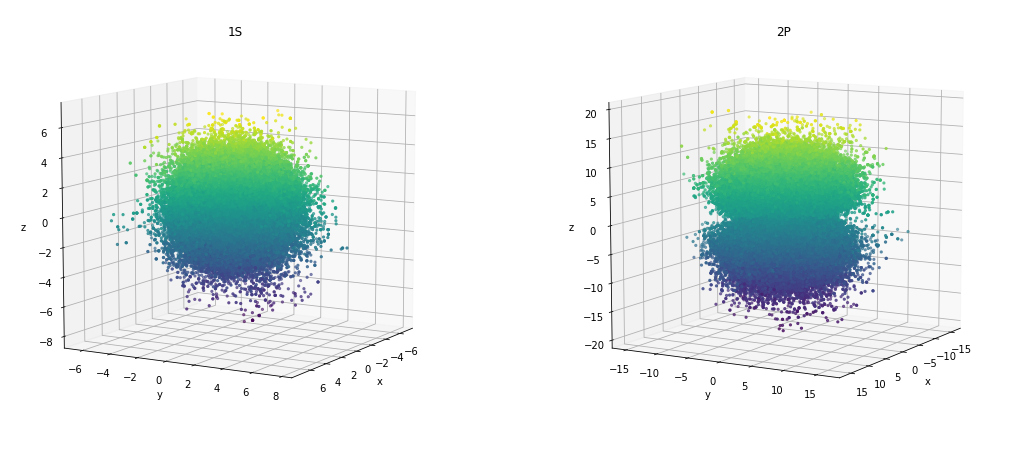

In [24]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(18,8))

X, Y, Z = np.loadtxt("es05.1/grafico3D1S.dat", usecols=(0,1,2), delimiter='	', unpack=True)

ax = fig.add_subplot(1,2,1,projection='3d')
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('1S')
ax.view_init(10, 30)


X, Y, Z = np.loadtxt("es05.1/grafico3D2P.dat", usecols=(0,1,2), delimiter='	', unpack=True)
ax = fig.add_subplot(1,2,2,projection='3d')
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('2P')
ax.view_init(10, 30)

plt.show()

Provando a partire da un punto lontano dall'origine (per esempio, (100;100;100)) non osservo grosse differenze (la quantità $\delta$ viene sempre modificata circa 20 volte prima che termini l'equilibrazione). Questo è probabilmente dovuto al fatto che quando inizio il campionamento vero e proprio, lo faccio dal punto in cui ero arrivata alla fine dell'equilibrazione e non dal punto letto da file di input; così facendo di fatto dimentico tutti i punti campionati durante l'equilibrazione. 

I blocchi devono contenere molti step ciascuno. In generale il fatto di fare blocchi grandi è sempre una cosa positiva: la media del blocco è più significativa perchè calclata con più punti e l'autocorrelazione tra un blocco e l'altro diminuisce. In particolare nel caso dell'algoritmo di Metropolis passi successivi sono fortemente correlati tra loro, proprio per come è fatto l'algoritmo. In questo caso è quindi fondamentale che i blocchi siano grandi perchè non vi sia significativa autocorrelazione.

Si riportano di seguito i risultati ottenuti usando come distribuzione *T(x'|x)* una Gaussiana:

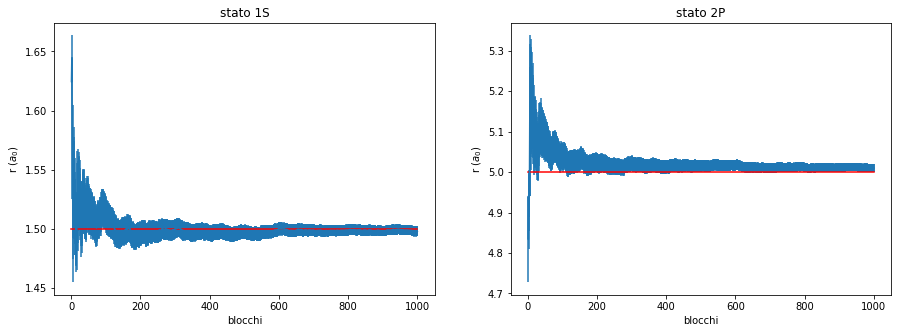

In [26]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
b, r, error = np.loadtxt("es05.1/1Sposizioni_gauss.dat", usecols=(0,1,2), delimiter='\t', unpack='true')
plt.errorbar(b,r,yerr=error)
g=np.full(b.size, 1.5)
plt.plot(b,g,c="red")
plt.xlabel('blocchi')
plt.ylabel('r ($a_0$)')
plt.title('stato 1S')

plt.subplot(1,2,2)
b, r, error = np.loadtxt("es05.1/2Pposizioni_gauss.dat", usecols=(0,1,2), delimiter='\t', unpack='true')
plt.errorbar(b,r,yerr=error)
g=np.full(b.size, 5)
plt.plot(b,g,c="red")
plt.xlabel('blocchi')
plt.ylabel('r ($a_0$)')
plt.title('stato 2P')

plt.show()

Il comportamento asintotico non cambia variando la distribuzione *T(x'|x)* (infatti $\langle r \rangle$ converge sempre al valore atteso); questa è una conferma del fatto che l'algoritmo di Metropolis funziona usando qualsiasi distribuzione *T(x'|x)*.